In [1]:
#import necessary libaries
#libaries for data wrangling
import pandas as pd
import numpy as np

# libaries for data cleaning
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for time
from datetime import datetime, timedelta

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set up views
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)





## Data Ingestion

In [2]:
import kagglehub
path = kagglehub.dataset_download("utkarshx27/crimes-2001-to-present")
print("path to dataset files:", path)

path to dataset files: C:\Users\ncc\.cache\kagglehub\datasets\utkarshx27\crimes-2001-to-present\versions\1


In [3]:
df = pd.read_csv("C:/Users/ncc/.cache/kagglehub/datasets/utkarshx27/crimes-2001-to-present/versions/1/Crimes_-_2001_to_Present.csv")
df.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [4]:
#convert the column to date to enable time series analysis on it.
#extract possible information from the column
df["Date"] = pd.to_datetime(df["Date"])

# Extract date components
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Hour"] = df["Date"].dt.hour
df["Day_of_Week"] = df["Date"].dt.dayofweek
df["Day_name"] = df["Date"].dt.day_name()
df['Month_Name'] = df['Date'].dt.month_name()
df['Quarter'] = df['Date'].dt.quarter
df['Is_Weekend'] = df['Day_of_Week'].isin([5, 6]) 


In [5]:
df_subset = df[df["Year"] == 2015]
df_subset

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour,Day_of_Week,Day_name,Month_Name,Quarter,Is_Weekend
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",9,5,13,5,Saturday,September,3,True
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",9,4,11,4,Friday,September,3,False
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",9,5,12,5,Saturday,September,3,True
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",9,5,13,5,Saturday,September,3,True
5,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)",9,5,10,5,Saturday,September,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767222,13018235,JG195275,2015-07-01 00:01:00,028XX S KOLIN AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,True,1031,10.0,22.0,30.0,17,NaN,NaN,2015,04/13/2023 05:36:27 PM,NaN,NaN,NaN,7,1,0,2,Wednesday,July,3,False
7772149,12618884,JF145092,2015-11-28 22:45:00,089XX S ESCANABA AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,423,4.0,10.0,46.0,17,1196944.0,1846190.0,2015,03/29/2023 04:54:39 PM,41.732810,-87.554086,"(41.732809973, -87.554085507)",11,28,22,5,Saturday,November,4,True
7772189,13024309,JG202406,2015-06-07 13:00:00,107XX S AVENUE N,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,CHURCH / SYNAGOGUE / PLACE OF WORSHIP,False,False,432,4.0,10.0,52.0,17,NaN,NaN,2015,03/29/2023 05:00:26 PM,NaN,NaN,NaN,6,7,13,6,Sunday,June,2,True
7772997,10035453,HY224553,2015-04-15 22:30:00,007XX N WOLCOTT AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,1221,12.0,1.0,24.0,02,1163598.0,1905131.0,2015,03/30/2023 05:01:17 PM,41.895314,-87.674592,"(41.895314447, -87.674591636)",4,15,22,2,Wednesday,April,2,False


## Preliminary Data Analysis

In [6]:
#set up views
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264755 entries, 0 to 7778302
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    264755 non-null  int64         
 1   Case Number           264755 non-null  object        
 2   Date                  264755 non-null  datetime64[ns]
 3   Block                 264755 non-null  object        
 4   IUCR                  264755 non-null  object        
 5   Primary Type          264755 non-null  object        
 6   Description           264755 non-null  object        
 7   Location Description  264168 non-null  object        
 8   Arrest                264755 non-null  bool          
 9   Domestic              264755 non-null  bool          
 10  Beat                  264755 non-null  int64         
 11  District              264755 non-null  float64       
 12  Ward                  264753 non-null  float64       
 13  Com

In [7]:
print("==== Dataset Overview====")
print("Dataset shape:",df_subset.shape)
print(f"Memory Usage: {df_subset.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nColunm information")
print(f"List of colunms: {df_subset.columns}")



==== Dataset Overview====
Dataset shape: (264755, 30)
Memory Usage: 198.87 MB

Colunm information
List of colunms: Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location', 'Month', 'Day', 'Hour', 'Day_of_Week', 'Day_name', 'Month_Name', 'Quarter', 'Is_Weekend'], dtype='object')


In [8]:
print("\n=== BASIC STATISTICS ===")
print(df_subset.describe(include='all'))
print("\n=== BASIC STATISTICS For Numerical Colunms===")
print(df_subset.describe())


=== BASIC STATISTICS ===
                  ID Case Number                           Date             Block    IUCR Primary Type Description Location Description  Arrest Domestic           Beat       District           Ward  Community Area FBI Code  X Coordinate  Y Coordinate      Year              Updated On       Latitude      Longitude                       Location          Month            Day           Hour    Day_of_Week Day_name Month_Name        Quarter Is_Weekend
count   2.647550e+05      264755                         264755            264755  264755       264755      264755               264168  264755   264755  264755.000000  264755.000000  264753.000000   264755.000000   264755  2.579310e+05  2.579310e+05  264755.0                  264755  257931.000000  257931.000000                         257931  264755.000000  264755.000000  264755.000000  264755.000000   264755     264755  264755.000000     264755
unique           NaN      264728                            NaN       

## Data Cleaning

In [9]:
df_subset.isna().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     587
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       2
Community Area             0
FBI Code                   0
X Coordinate            6824
Y Coordinate            6824
Year                       0
Updated On                 0
Latitude                6824
Longitude               6824
Location                6824
Month                      0
Day                        0
Hour                       0
Day_of_Week                0
Day_name                   0
Month_Name                 0
Quarter                    0
Is_Weekend                 0
dtype: int64

In [10]:
df_subset.dropna(inplace=True)

In [11]:
df_subset.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
Hour                    0
Day_of_Week             0
Day_name                0
Month_Name              0
Quarter                 0
Is_Weekend              0
dtype: int64

In [12]:
df_subset.duplicated().sum()

np.int64(0)

In [13]:
df_subset.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour,Day_of_Week,Day_name,Month_Name,Quarter,Is_Weekend
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",9,5,13,5,Saturday,September,3,True
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",9,4,11,4,Friday,September,3,False
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",9,5,12,5,Saturday,September,3,True
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",9,5,13,5,Saturday,September,3,True
5,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)",9,5,10,5,Saturday,September,3,True


In [14]:
df_subset.set_index("ID", inplace=True)

In [15]:
df_subset

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour,Day_of_Week,Day_name,Month_Name,Quarter,Is_Weekend
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",9,5,13,5,Saturday,September,3,True
10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",9,4,11,4,Friday,September,3,False
10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",9,5,12,5,Saturday,September,3,True
10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",9,5,13,5,Saturday,September,3,True
10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)",9,5,10,5,Saturday,September,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10261019,HY448584,2015-10-03 20:59:00,051XX S WABASH AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE - GARAGE,False,False,225,2.0,3.0,40.0,05,1177588.0,1870895.0,2015,03/18/2023 04:46:35 PM,41.801062,-87.624249,"(41.801062213, -87.624248541)",10,3,20,5,Saturday,October,4,True
10239974,HY427695,2015-09-17 22:30:00,117XX S MORGAN ST,041A,BATTERY,AGGRAVATED - HANDGUN,RESIDENCE - PORCH / HALLWAY,False,False,524,5.0,34.0,53.0,04B,1171768.0,1827029.0,2015,03/20/2023 04:45:36 PM,41.680818,-87.646876,"(41.680817764, -87.646875671)",9,17,22,3,Thursday,September,3,False
12618884,JF145092,2015-11-28 22:45:00,089XX S ESCANABA AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,423,4.0,10.0,46.0,17,1196944.0,1846190.0,2015,03/29/2023 04:54:39 PM,41.732810,-87.554086,"(41.732809973, -87.554085507)",11,28,22,5,Saturday,November,4,True


In [16]:
df_crime = df_subset["Primary Type"].value_counts()
df_crime

Primary Type
THEFT                                56696
BATTERY                              48821
CRIMINAL DAMAGE                      28589
NARCOTICS                            21607
OTHER OFFENSE                        17279
ASSAULT                              16992
DECEPTIVE PRACTICE                   13945
BURGLARY                             13103
MOTOR VEHICLE THEFT                  10003
ROBBERY                               9631
CRIMINAL TRESPASS                     6390
WEAPONS VIOLATION                     3333
PUBLIC PEACE VIOLATION                2414
OFFENSE INVOLVING CHILDREN            2070
PROSTITUTION                          1322
INTERFERENCE WITH PUBLIC OFFICER      1305
CRIM SEXUAL ASSAULT                   1218
SEX OFFENSE                            869
HOMICIDE                               502
ARSON                                  453
GAMBLING                               310
LIQUOR LAW VIOLATION                   291
KIDNAPPING                             18

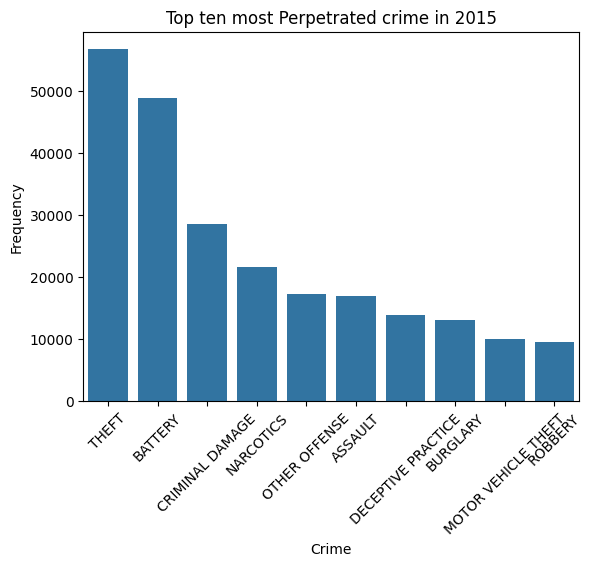

In [17]:
df_crime = df_subset["Primary Type"].value_counts().sort_values(ascending=False).head(10)
sns.barplot(df_crime)
plt.xlabel("Crime")
plt.ylabel("Frequency")
plt.title("Top ten most Perpetrated crime in 2015")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Since theft is the hihest crime, let's explore it.
df_theft = df_subset[df_subset["Primary Type"] == "THEFT"]
df_theft.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour,Day_of_Week,Day_name,Month_Name,Quarter,Is_Weekend
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",9,4,11,4,Friday,September,3,False
10224744,HY411605,2015-09-05 13:00:00,025XX W CERMAK RD,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,1034,10.0,25.0,31.0,06,1159734.0,1889313.0,2015,09/17/2015 11:37:18 AM,41.851989,-87.689219,"(41.851988885, -87.689219118)",9,5,13,5,Saturday,September,3,True
10224746,HY411662,2015-09-05 14:00:00,071XX S PULASKI RD,0820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,False,833,8.0,13.0,65.0,06,1150938.0,1857056.0,2015,02/10/2018 03:50:01 PM,41.763648,-87.722345,"(41.763647552, -87.722344693)",9,5,14,5,Saturday,September,3,True
10224752,HY411601,2015-09-03 13:00:00,020XX W SCHILLER ST,0810,THEFT,OVER $500,STREET,False,False,1424,14.0,1.0,24.0,06,1162574.0,1909428.0,2015,02/10/2018 03:50:01 PM,41.907127,-87.678232,"(41.907127255, -87.678232016)",9,3,13,3,Thursday,September,3,False
10224768,HY410651,2015-09-03 20:30:00,078XX S ESCANABA AVE,0810,THEFT,OVER $500,VEHICLE NON-COMMERCIAL,False,False,421,4.0,7.0,43.0,06,1196887.0,1853400.0,2015,02/10/2018 03:50:01 PM,41.752596,-87.554055,"(41.752596188, -87.554055126)",9,3,20,3,Thursday,September,3,False


In [31]:
df_theft["District"].value_counts().sort_values(ascending=False).head(10)

District
1.0     5587
18.0    5221
19.0    4124
12.0    3590
8.0     3350
14.0    3118
6.0     2823
25.0    2707
4.0     2467
2.0     2420
Name: count, dtype: int64

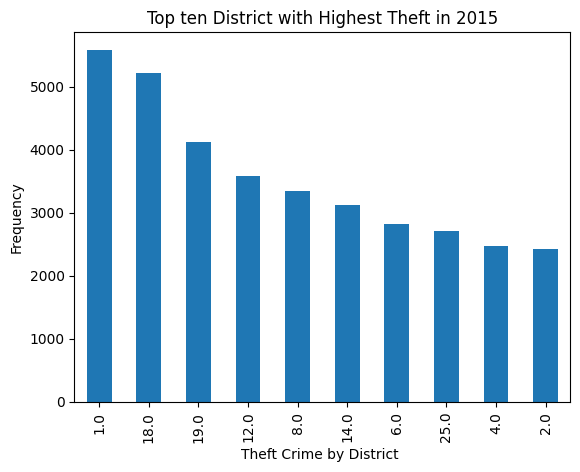

In [32]:
df_theft["District"].value_counts().sort_values(ascending=False).head(10).plot(kind="bar")
plt.xlabel("Theft Crime by District ")
plt.ylabel("Frequency")
plt.title("Top ten District with Highest Theft in 2015")
# plt.xticks(rotation=45)
plt.show()

In [ ]:
df_theft["Arrest"].value_counts()

Arrest
False    49934
True      6762
Name: count, dtype: int64

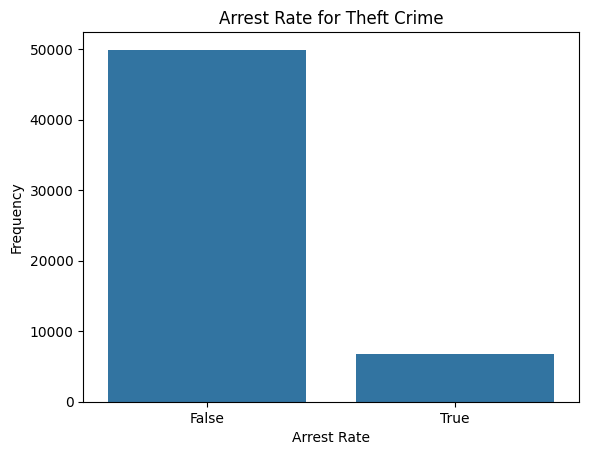

In [37]:
sns.countplot(x=df_theft["Arrest"])
plt.xlabel("Arrest Rate")
plt.ylabel("Frequency")
plt.title("Arrest Rate for Theft Crime")
# plt.xticks(rotation=45)
plt.show()

In [19]:
df_subset.groupby("Primary Type")["Arrest"].sum()

Primary Type
ARSON                                   52
ASSAULT                               4056
BATTERY                              11559
BURGLARY                               723
CONCEALED CARRY LICENSE VIOLATION       33
CRIM SEXUAL ASSAULT                    146
CRIMINAL DAMAGE                       1833
CRIMINAL SEXUAL ASSAULT                  9
CRIMINAL TRESPASS                     4395
DECEPTIVE PRACTICE                     984
GAMBLING                               310
HOMICIDE                               214
HUMAN TRAFFICKING                        4
INTERFERENCE WITH PUBLIC OFFICER      1252
INTIMIDATION                            21
KIDNAPPING                              15
LIQUOR LAW VIOLATION                   290
MOTOR VEHICLE THEFT                    999
NARCOTICS                            21599
NON - CRIMINAL                           4
NON-CRIMINAL                             2
OBSCENITY                               32
OFFENSE INVOLVING CHILDREN             36

In [20]:
df_subset.groupby("Primary Type")["Arrest"].sum().sort_values(ascending=False).head(10)

Primary Type
NARCOTICS                 21599
BATTERY                   11559
THEFT                      6762
OTHER OFFENSE              4787
CRIMINAL TRESPASS          4395
ASSAULT                    4056
WEAPONS VIOLATION          2675
PUBLIC PEACE VIOLATION     1880
CRIMINAL DAMAGE            1833
PROSTITUTION               1320
Name: Arrest, dtype: int64

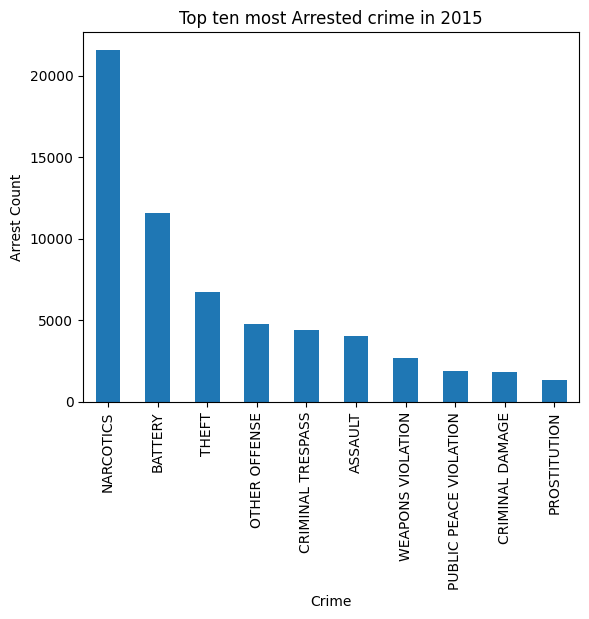

In [21]:
df_subset.groupby("Primary Type")["Arrest"].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plt.xlabel("Crime")
plt.ylabel("Arrest Count")
plt.title("Top ten most Arrested crime in 2015")
# plt.xticks(rotation=45)
plt.show()

In [38]:
df_subset.groupby("Primary Type")["District"].value_counts().sort_values(ascending=False)

Primary Type                       District
THEFT                              1.0         5587
                                   18.0        5221
NARCOTICS                          11.0        4986
THEFT                              19.0        4124
BATTERY                            11.0        3624
                                               ... 
CRIMINAL SEXUAL ASSAULT            14.0           1
NON - CRIMINAL                     14.0           1
CONCEALED CARRY LICENSE VIOLATION  17.0           1
THEFT                              31.0           1
ASSAULT                            31.0           1
Name: count, Length: 648, dtype: int64